# 단일 테스트용 코드

In [141]:
#-*- coding: utf-8 -*-
import requests
import json, os
url = "UNKNOWN"
resp = requests.put('http://' + url + '/api/v1/type/service/chatbot/cb0001/', 
                    json={  "intent_id" : "",
                            "edit_history" : [],
                            "input_data": "(광양)화성부 김승우",
                            "convert_data" : "",
                            "intent_history" : [],
                            "request_type" : "text",
                            "service_type" : "I",
                            "story_board_id" : "",
                            "story_key_entity" : [],
                            "story_slot_entity" : [],
                            "output_data" : ""
                          })
print(resp.json())
print("1. 입력문장: {0}".format(resp.json()['input_data']))
print("2. 분석의도: {0}".format(resp.json()['test_intent_id']))
print("3. 분석Entity: {0}".format(resp.json()['test_slot_entity']))

b7b7dc1fff64:8000
{'story_ner_entity': [{'val': ['김승우', '김승우'], 'key': 'tagname'}], 'story_slot_entity': [{'val': ['화성부'], 'key': '9415774b-5fba-11e7-a2c2-4562a502e279'}, {'val': ['광양'], 'key': 'b3d891c6-5fba-11e7-a2c2-4562a502e279'}, {'val': ['김승우'], 'key': '83e9256c-5fba-11e7-a2c2-4562a502e279'}], 'story_key_entity': [], 'morphed_data': ['(', '광양', ')', '화성부', '김승우'], 'input_data': '(광양)화성부 김승우', 'convert_dict_data': ['(', 'tagloc', ')', 'tagorg', 'tagname'], 'output_data': '', 'convert_data': ['tagorg', 'tagname'], 'test_intent_id': ['8'], 'intent_id': ['c3041cd0-5d46-11e7-a7ce-f53d67ca25aa'], 'pattern_intent_id': ['8'], 'test_slot_entity': [{'val': ['화성부'], 'key': 'tagorg'}, {'val': ['광양'], 'key': 'tagloc'}, {'val': ['김승우'], 'key': 'tagname'}], 'request_type': 'text', 'service_type': 'I', 'story_board_id': '', 'intent_history': ['', {'P': '8'}, {'i': '8'}], 'edit_history': []}
1. 입력문장: (광양)화성부 김승우
2. 분석의도: ['8']
3. 분석Entity: [{'val': ['화성부'], 'key': 'tagorg'}, {'val': ['광양'], 'key'

# 복수의 Test Set 을 테스트하고 그 결과를 종합 

In [176]:
#-*- coding: utf-8 -*-
import requests
import json, os
import threading 
import platform

class Messenger(threading.Thread):
    def __init__(self, input, url, cb_id) :
        threading.Thread.__init__(self)
        self.input = input 
        self.ret = None
        self.url = url
        self.chatbot_id = cb_id

    def join(self):
        threading.Thread.join(self)
        return self.ret

    def run(self) :
        input_data = self.input['input']
        resp = requests.put('http://' + self.url + '/api/v1/type/service/chatbot/'+ self.chatbot_id +'/', 
                            json={  
                                    "intent_id" : "",
                                    "edit_history" : [],
                                    "input_data": input_data,
                                    "convert_data" : "",
                                    "intent_history" : [],
                                    "request_type" : "text",
                                    "service_type" : "I",
                                    "story_board_id" : "",
                                    "story_key_entity" : [],
                                    "story_slot_entity" : [],
                                    "output_data" : ""
                                  })
        self.ret = (resp.json(), self.input)

class ChatBotTest() :
    
    def __init__(self) : 
        self.thread_num = 3 
        self.url =  "UNKNOWN"
        self.cb_id = 'cb0001'
        self.result = {}
        self.result['labels'] = ['-1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
        self.label_len = len(self.result['labels'])
        self.result['predicts'] = [[0 for col in range(self.label_len)] for row in range(self.label_len)]
        for i in range(0, self.label_len - 1, 1):
            for j in range(0, self.label_len - 1, 1):
                self.result['predicts'][i][j] = 0

        
    def run_test(self, test_data) : 
        if (type(test_data) is not list) :
            raise Exception ("test data must be list type")
        
        thread = []
        for data in test_data :
            thread.append(Messenger(data, self.url, self.cb_id))
            
        for trd in thread :
            trd.start()
            
        for trd in thread :
            result = trd.join()
            self.summerize_intent_match(result[1]['intent'], result[0]['test_intent_id'][0] )
            self.check_result_correct(result)
                                        
    def get_intent_match_result(self):
        return self.result
            
    def summerize_intent_match(self,label, predict):
        i = self.result['labels'].index(label)
        j = self.result['labels'].index(predict)
        self.result['predicts'][i][j] = self.result['predicts'][i][j]  + 1
        
    def check_result_correct(self, result) :
        if(result[1]['intent'] != result[0]['test_intent_id'][0]) :
            print("Intent Unmatch: {0}".format(result[1]['input']))
        anal_entitiy = list(map(lambda x : x['key'] , result[0]['test_slot_entity']))  
        if(len(set(result[1]['slot']) - set(anal_entitiy)) > 0 ) :
            print("Entity Unmatch : {0}".format(result[1]['input']))
                  
print("load class done")

load class done


# 실제 데이터 넣고 테스트

In [177]:
test_data = [{"input" : "오늘 김수상 휴가", "intent":"5","slot":["tagname"]},
            {"input" : "화학시험섹션 김수상 찾아줘", "intent":"9","slot":["tagname"]},
            {"input" : "포항의 경영지원팀장 찾아줘", "intent":"1","slot":["tagname"]},
            {"input" : "포항의 화학시험팀장 찾아줘", "intent":"1","slot":["tagname"]},
            {"input" : "김수상의 팀장", "intent":"2","slot":["tagname"]},
            {"input" : "김수상 부장의 팀장", "intent":"2","slot":["tagname"]},
            {"input" : "김수상 차장의 사업부장", "intent":"2","slot":["tagname"]},
            {"input" : "김수상 휴가인가", "intent":"5","slot":["tagname"]},
            {"input" : "김수상 오늘 근태", "intent":"5","slot":["tagname"]},
            {"input" : "김수상 부장 오늘 출장", "intent":"5","slot":["tagname"]},
            {"input" : "김수상 부장 오늘 해외 출장", "intent":"5","slot":["tagname"]},
            {"input" : "오늘 김수상 휴가", "intent":"5","slot":["tagname"]},
            {"input" : "김수상 부장 오늘 해외 출장", "intent":"5","slot":["tagname"]},
            {"input" : "경영지원본부장 전화", "intent":"3","slot":["tagname"]},
            ]
testCls = ChatBotTest()
testCls.run_test(test_data)
data = testCls.get_intent_match_result()

Intent Unmatch: 화학시험섹션 김수상 찾아줘
Entity Unmatch : 포항의 경영지원팀장 찾아줘
Intent Unmatch: 포항의 화학시험팀장 찾아줘
Entity Unmatch : 포항의 화학시험팀장 찾아줘
Intent Unmatch: 김수상 차장의 사업부장
Entity Unmatch : 경영지원본부장 전화


# 테스트 결과를 Cross Table 형태로 표현 

<IPython.core.display.Javascript object>


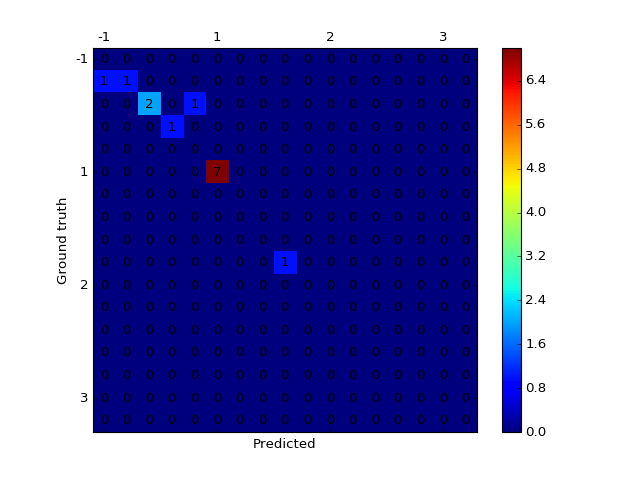

In [178]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import requests
import json, os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import pandas as pd

y = data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame(y_y)
#df = df.transpose()
df.columns = y

labels = y
fig, ax = plt.subplots()
h = ax.matshow(df)
fig.colorbar(h)
for _r in range(len(y)):
    for _c in range(len(y)):
        ax.text(_c, _r, df.values[_r][_c], va='center', ha='center')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')